# f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x)
1. Определить корни
2. Найти интервалы, на которых функция возрастает
3. Найти интервалы, на которых функция убывает
4. Построить график
5. Вычислить вершину
6. Определить промежутки, на котором f > 0
7. Определить промежутки, на котором f < 0

### Импорт функций

In [5]:
from sympy import Symbol
from sympy import solveset, nonlinsolve, linsolve, maximum, minimum, evalf, solve
from sympy import sin, cos, pi, sqrt, tan, atan, log
from sympy import plot, pprint
from sympy import is_increasing, is_decreasing, is_monotonic
from sympy import S, Interval, oo

### Задание функции

In [6]:
x = Symbol('x', real = True)
y = ((sin(x)/2 + cos(x)/2)**2)*sin(x)
y

(sin(x)/2 + cos(x)/2)**2*sin(x)

### 1. Определить корни

In [7]:
res_solve = solve(y, x, domain = S.Reals)
print(res_solve)

[0, -pi/4, 3*pi/4, pi]


In [8]:
solveset(y, x, domain = S.Reals)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

#### Вычисление производной

In [9]:
yd = y.diff(x)
pprint(yd)

                                                               2       
                   ⎛sin(x)   cos(x)⎞          ⎛sin(x)   cos(x)⎞        
(-sin(x) + cos(x))⋅⎜────── + ──────⎟⋅sin(x) + ⎜────── + ──────⎟ ⋅cos(x)
                   ⎝  2        2   ⎠          ⎝  2        2   ⎠        


#### Вычисление экстремумов производной

In [27]:
res_solve_yd = solve(yd, x)
for i in res_solve_yd:
    print(round(i.evalf(), 2), '\t', i)

-0.79 	 -pi/4
2.36 	 3*pi/4
-2.08 	 -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)
2.87 	 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)
1.06 	 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)
-0.27 	 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)


Обозначаем отрезки

In [28]:
if res_solve_yd[-1] != pi:
    res_solve_yd.append(pi)
if res_solve_yd[0] != -pi:
    res_solve_yd.insert(0, -pi)
res_solve_yd.sort()
for i in res_solve_yd:
    print(round(i.evalf(), 2), '\t', i)

-3.14 	 -pi
-2.08 	 -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)
-0.79 	 -pi/4
-0.27 	 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)
1.06 	 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)
2.36 	 3*pi/4
2.87 	 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)
3.14 	 pi


### 2. Найти интервалы, на которых функция возрастает
### 3. Найти интервалы, на которых функция убывает

In [35]:
for i in range(len(res_solve_yd)-1):
    res = yd.subs(x, (res_solve_yd[i+1] + res_solve_yd[i])/2.0)
    if res > 0:
        pprint(f"На отрезке ({round(res_solve_yd[i].evalf(), 2)} : {round(res_solve_yd[i+1].evalf(), 2)}) - функция возрастает")
    else:
        pprint(f"На отрезке ({round(res_solve_yd[i].evalf(), 2)} : {round(res_solve_yd[i+1].evalf(), 2)}) - функция убывает")

На отрезке (-3.14 : -2.08) - функция убывает
На отрезке (-2.08 : -0.79) - функция возрастает
На отрезке (-0.79 : -0.27) - функция убывает
На отрезке (-0.27 : 1.06) - функция возрастает
На отрезке (1.06 : 2.36) - функция убывает
На отрезке (2.36 : 2.87) - функция возрастает
На отрезке (2.87 : 3.14) - функция убывает


### 4. Построить график

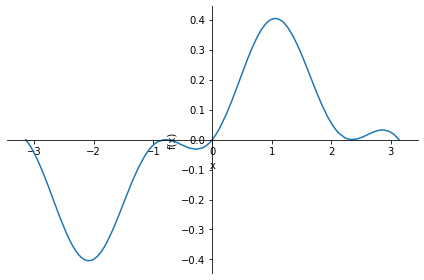

In [36]:
graph = plot (y, (x, -pi, pi))

### 5. Вычислить вершину

In [37]:
y_max = maximum(y, x, Interval(-pi, pi)).evalf()
y_min = minimum(y, x, Interval(-pi, pi)).evalf()

print('y_max = ', round(y_max, 3))
print('y_min = ', round(y_min, 3))

y_max =  0.404
y_min =  -0.404


In [41]:
for i in range(len(res_solve_yd)):
    res = y.subs(x, res_solve_yd[i])
    print(f"Вершина {i+1}: x = {round(res_solve_yd[i].evalf(), 2)}, y = {round(res, 2)}")
    if i == 0:
        ymax = res
        ymin = res
    else:
        if res < ymin:
            ymin = res
        if res > ymax:
            ymax = res
print()
print('y_max = ', ymax.evalf())
print('y_min = ', ymin.evalf())

Вершина 1: x = -3.14, y = 0
Вершина 2: x = -2.08, y = -0.40
Вершина 3: x = -0.79, y = 0
Вершина 4: x = -0.27, y = -0.03
Вершина 5: x = 1.06, y = 0.40
Вершина 6: x = 2.36, y = 0
Вершина 7: x = 2.87, y = 0.03
Вершина 8: x = 3.14, y = 0

y_max =  0.404106232073136
y_min =  -0.404106232073136


###### 6. Определить промежутки, на котором f > 0
###### 7. Определить промежутки, на котором f < 0

In [42]:
if res_solve[-1] != pi:
    res_solve.append(pi)
if res_solve[0] != -pi:
    res_solve.insert(0, -pi)
res_solve.sort()
print(res_solve)

[-pi, -pi/4, 0, 3*pi/4, pi]


In [43]:
for i in range(len(res_solve)-1):
    res = y.subs(x, (res_solve[i+1] + res_solve[i])/2.0)
    if res > 0:
        pprint(f"На отрезке ({res_solve[i]} : {res_solve[i+1]} - функция больше 0)")
    else:
        pprint(f"На отрезке ({res_solve[i]} : {res_solve[i+1]} - функция меньше 0)")

На отрезке (-pi : -pi/4 - функция меньше 0)
На отрезке (-pi/4 : 0 - функция меньше 0)
На отрезке (0 : 3*pi/4 - функция больше 0)
На отрезке (3*pi/4 : pi - функция больше 0)
